In [ ]:
# źródło kodu: https://www.youtube.com/watch?v=0Lt9w-BxKFQ

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [161]:
#loading dataset
typologia=pd.read_csv("C:/Users/Maria/Documents/wyniki/1507/typologia_Bajena1307v4.csv", index_col=0, sep=';')
df = pd.DataFrame(typologia)
df.head()

,"[pos=""depr""&head.pos=""num""&deprel=""comp""]","[pos=""depr""&head.pos=""fin""&deprel=""subj""]","[pos=""depr""&head.pos=""praet""&deprel=""subj""]","[pos=""depr""&head.pos=""praet""&deprel=""vocative""]","[pos=""depr""&head.pos=""conj""&deprel=""subj""]","[pos=""num""&head.pos=""num""&deprel=""comp""]","[pos=""num""&head.pos=""num""&deprel=""adjunct""]","[pos=""num""&head.pos=""num""&deprel=""mwe""]","[pos=""num""&head.pos=""adv""&deprel=""comp""]","[pos=""num""&head.pos=""adv""&deprel=""adjunct""]",...,"[pos=""(imps)""]","[pos=""(impt)""]","[pos=""(inf)""][pos=""bedzie""]","[pos=""(inf)""]","[pos=""(num)""]","[pos=""(pact)""]","[pos=""(pant)""]","[pos=""(pcon)""]","[pos=""(ppas)""]",typ
fakt_b.txt,0,0,0,0,0,0,0,1,0,0,...,8,12,0,76,37,32,0,22,48,fakt
fakt_ba.txt,0,0,0,0,0,0,0,0,0,0,...,1,4,0,85,39,14,2,13,40,fakt
fakt_baa.txt,0,0,0,0,0,0,0,0,0,1,...,15,5,0,93,26,20,0,14,35,fakt
fakt_bab.txt,0,0,0,0,0,0,0,0,0,0,...,22,0,0,61,44,24,4,21,52,fakt
fakt_bac.txt,0,0,0,0,0,0,0,0,0,0,...,4,7,0,51,30,38,1,15,86,fakt


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, fakt_b.txt to urzed_jj.txt
Columns: 1188 entries, [pos="depr"&head.pos="num"&deprel="comp"] to typ
dtypes: float64(1), int64(1186), object(1)
memory usage: 12.0+ MB


In [163]:
df['typ'].unique()

array(['fakt', 'infpor', 'konwers', 'lit', 'ndksiazka', 'netinterakt',
       'net_nieint', 'nklasksiazka', 'publ', 'qmow', 'urzed'],
      dtype=object)

In [164]:
label_typ=LabelEncoder()

In [165]:
df['typ'] = label_typ.fit_transform(df['typ'])

In [166]:
df['typ'].value_counts()

8     175
10    150
9     150
6     150
1     150
3     149
2     141
0     105
4      93
5      37
7      25
Name: typ, dtype: int64

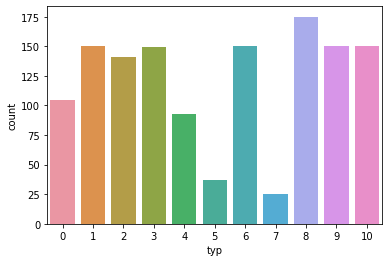

In [167]:
sns.countplot(df['typ'])

In [168]:
#Now separate the dataset as response variable and feature variables
X = df.drop('typ', axis=1)
y = df['typ']

In [169]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [170]:
#Applying Standard scaling to get optimized results
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Maria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Maria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Maria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [171]:
X_train[:10]

array([[ 0.        , -0.2785912 , -0.21486752, ..., -0.43261828,
        -0.46581861, -0.75807182],
       [ 0.        , -0.2785912 , -0.21486752, ..., -0.43261828,
         0.00766149, -0.28852696],
       [ 0.        , -0.2785912 , -0.21486752, ..., -0.43261828,
        -1.4127788 ,  1.35488005],
       ...,
       [ 0.        , -0.2785912 , -0.21486752, ..., -0.43261828,
        -1.4127788 , -1.49173566],
       [ 0.        , -0.2785912 , -0.21486752, ...,  1.36979585,
         1.66484183, -0.5819925 ],
       [ 0.        , -0.2785912 , -0.21486752, ..., -0.43261828,
        -1.29440878, -1.05153736]])

# Random Forest Classifier

In [172]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [173]:
#How well the model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.61      0.76      0.68        25
           1       0.87      0.98      0.92        42
           2       1.00      1.00      1.00        56
           3       0.85      0.87      0.86        47
           4       0.87      0.82      0.84        33
           5       0.00      0.00      0.00         8
           6       0.88      0.95      0.92        40
           7       0.00      0.00      0.00         7
           8       0.79      0.82      0.81        56
           9       1.00      1.00      1.00        42
          10       1.00      1.00      1.00        42

   micro avg       0.88      0.88      0.88       398
   macro avg       0.72      0.75      0.73       398
weighted avg       0.86      0.88      0.87       398

[[19  1  0  5  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  1  0  0]
 [ 0  0 56  0  0  0  0  0  0  0  0]
 [ 3  0  0 41  0  0  3  0  0  0  0]
 [ 3  2  0  0 27  0  0  0  1  0  0]
 [ 0  1

C:\Users\Maria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM Classifier

In [174]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

C:\Users\Maria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [175]:
#How well the model performed
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.58      0.72      0.64        25
           1       0.90      0.88      0.89        42
           2       1.00      0.95      0.97        56
           3       0.91      0.85      0.88        47
           4       0.93      0.79      0.85        33
           5       0.00      0.00      0.00         8
           6       0.63      0.93      0.75        40
           7       0.00      0.00      0.00         7
           8       0.70      0.77      0.74        56
           9       1.00      0.93      0.96        42
          10       1.00      1.00      1.00        42

   micro avg       0.84      0.84      0.84       398
   macro avg       0.70      0.71      0.70       398
weighted avg       0.83      0.84      0.83       398

[[18  0  0  3  0  0  2  0  2  0  0]
 [ 0 37  0  0  0  0  2  0  3  0  0]
 [ 0  0 53  0  0  0  3  0  0  0  0]
 [ 5  0  0 40  0  0  2  0  0  0  0]
 [ 2  1  0  0 26  0  3  0  1  0  0]
 [ 0  0

C:\Users\Maria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Neural Network

In [176]:
mlpc=MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=10000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [177]:
#How well the model performed
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.43      0.64      0.52        25
           1       0.76      0.93      0.84        42
           2       0.98      0.98      0.98        56
           3       0.84      0.81      0.83        47
           4       0.83      0.76      0.79        33
           5       0.40      0.25      0.31         8
           6       0.95      0.88      0.91        40
           7       0.25      0.14      0.18         7
           8       0.80      0.73      0.77        56
           9       1.00      0.95      0.98        42
          10       1.00      1.00      1.00        42

   micro avg       0.84      0.84      0.84       398
   macro avg       0.75      0.73      0.74       398
weighted avg       0.85      0.84      0.84       398

[[16  0  0  5  0  0  0  2  2  0  0]
 [ 0 39  0  0  0  2  0  0  1  0  0]
 [ 0  1 55  0  0  0  0  0  0  0  0]
 [ 7  0  1 38  0  0  1  0  0  0  0]
 [ 4  2  0  0 25  1  0  0  1  0  0]
 [ 1  1

# Bayes

In [178]:
from sklearn.naive_bayes import BernoulliNB
BernNB = BernoulliNB(binarize = True)
BernNB.fit(X_train, y_train)
print(BernNB)

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)


In [179]:
y_expect = y_test
pred_NB = BernNB.predict(X_test)

# Accuracy Results Summary

In [180]:
from sklearn.metrics import accuracy_score
accuracy_rfc = accuracy_score(y_test, pred_rfc)
accuracy_clf = accuracy_score(y_test, pred_clf)
accuracy_mlpc = accuracy_score(y_test, pred_mlpc)
accuracy_NB = accuracy_score(y_test, pred_NB)

print("Accuracy Random Forest: ", accuracy_rfc)
print("Accuracy SVM: ", accuracy_clf)
print("Accuracy Neural Network: ", accuracy_mlpc)
print("Accuracy Bayes: ", accuracy_NB)

Accuracy Random Forest:  0.8844221105527639
Accuracy SVM:  0.8417085427135679
Accuracy Neural Network:  0.8391959798994975
Accuracy Bayes:  0.8567839195979899
